In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# print(X)
# print(y)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Reshape the input data to be 3-dimensional for LSTM
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
# print(X.shape[2])

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predict the target values for the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to their original scale
print(model.output_shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape
      )
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate the root mean squared error of the predictions
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", rmse)


Epoch 1/50
29/29 [==============================] - 3s 4ms/step - loss: 2944.4583
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 2840.0610
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 2678.6431
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 2470.8994
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 2252.9180
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 2051.2537
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 1874.8195
Epoch 8/50
29/29 [==============================] - 0s 5ms/step - loss: 1722.2566
Epoch 9/50
29/29 [==============================] - 0s 4ms/step - loss: 1588.6992
Epoch 10/50
29/29 [==============================] - 0s 5ms/step - loss: 1471.5005
Epoch 11/50
29/29 [==============================] - 0s 5ms/step - loss: 1367.5120
Epoch 12/50
29/29 [==============================] - 0s 4ms/step - loss: 1274.1725
Epoch 13/50
2

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.iloc[:, :-1].values
y = (df['Close Price'].shift(-1) > df['Close Price']).astype(int).values

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict the target values for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the accuracy and AUC of the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUC:", auc)


Epoch 1/100
24/24 [==============================] - 3s 44ms/step - loss: 0.6917 - accuracy: 0.5183 - val_loss: 0.6801 - val_accuracy: 0.5622
Epoch 2/100
24/24 [==============================] - 0s 16ms/step - loss: 0.6901 - accuracy: 0.5210 - val_loss: 0.6798 - val_accuracy: 0.5622
Epoch 3/100
24/24 [==============================] - 0s 17ms/step - loss: 0.6888 - accuracy: 0.5426 - val_loss: 0.6796 - val_accuracy: 0.5838
Epoch 4/100
24/24 [==============================] - 0s 15ms/step - loss: 0.6883 - accuracy: 0.5440 - val_loss: 0.6787 - val_accuracy: 0.5730
Epoch 5/100
24/24 [==============================] - 0s 15ms/step - loss: 0.6892 - accuracy: 0.5507 - val_loss: 0.6797 - val_accuracy: 0.5946
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 0.6882 - accuracy: 0.5535 - val_loss: 0.6826 - val_accuracy: 0.5730
Epoch 7/100
24/24 [==============================] - 0s 15ms/step - loss: 0.6889 - accuracy: 0.5480 - val_loss: 0.6813 - val_accuracy: 0.5622
Epoch 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the features and target variable
X = df.iloc[:, :-1].values
y = (df['Close Price'].shift(-1) > df['Close Price']).astype(int).values

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict the target values for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the accuracy and AUC of the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUC:", auc)


Epoch 1/100
24/24 [==============================] - 7s 74ms/step - loss: 0.6928 - accuracy: 0.5129 - val_loss: 0.6781 - val_accuracy: 0.5838
Epoch 2/100
24/24 [==============================] - 1s 28ms/step - loss: 0.6888 - accuracy: 0.5467 - val_loss: 0.6831 - val_accuracy: 0.5838
Epoch 3/100
24/24 [==============================] - 1s 31ms/step - loss: 0.6896 - accuracy: 0.5318 - val_loss: 0.6797 - val_accuracy: 0.5784
Epoch 4/100
24/24 [==============================] - 1s 29ms/step - loss: 0.6888 - accuracy: 0.5494 - val_loss: 0.6807 - val_accuracy: 0.6108
Epoch 5/100
24/24 [==============================] - 1s 29ms/step - loss: 0.6886 - accuracy: 0.5535 - val_loss: 0.6772 - val_accuracy: 0.6054
Epoch 6/100
24/24 [==============================] - 1s 42ms/step - loss: 0.6894 - accuracy: 0.5386 - val_loss: 0.6778 - val_accuracy: 0.5676
Epoch 7/100
24/24 [==============================] - 1s 47ms/step - loss: 0.6892 - accuracy: 0.5426 - val_loss: 0.6795 - val_accuracy: 0.6054
Epoch 

In [ ]:
pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 KB 9.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tsfresh import extract_features

# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the features and target variable
y = (df['Close Price'].shift(-1) > df['Close Price']).astype(int).values

# Extract features using tsfresh
df = df.drop(['Close Price'], axis='columns')
X = extract_features(df, column_id='Open')

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict the target values for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the accuracy and AUC of the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUC:", auc)


<ipython-input-4-80296f32ee1b>:13: UserWarning: Parsing '13-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df['Date'])
<ipython-input-4-80296f32ee1b>:13: UserWarning: Parsing '14-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df['Date'])
<ipython-input-4-80296f32ee1b>:13: UserWarning: Parsing '17-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df['Date'])
<ipython-input-4-80296f32ee1b>:13: UserWarning: Parsing '18-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df['Date'])
<ipython-input-4-80296f32ee1b>:13: UserWarning: Parsing '19-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tsfresh import extract_features


# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the features and target variable
y = (df['Close Price'].shift(-1) > df['Close Price']).astype(int).values

# Drop the last row from y
y = y[:-1]

# Extract features using tsfresh
df = df.drop(['Close Price'], axis='columns')
X = extract_features(df, column_id='Open')

# Drop the last row from X
X = X[:-1]

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict the target values for the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Calculate the accuracy and AUC of the model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("AUC:", auc)


Feature Extraction: 100%|██████████| 17696/17696 [10:15<00:00, 28.77it/s]


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tsfresh import extract_features

# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the features and target variable
y = (df['Close Price'].shift(-1) > df['Close Price']).astype(int).values

# Extract features using tsfresh
df = df.drop(['Close Price'], axis='columns')
X_tsfresh = extract_features(df, column_id='Open')

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X_tsfresh = scaler.fit_transform(X_tsfresh)

# Concatenate tsfresh features with original features
X = np.concatenate([df.values, X_tsfresh], axis=1)

# Save the concatenated features to a new CSV file
df_new = pd.DataFrame(X, columns=list(df.columns) + list(X_tsfresh.columns))
df_new.to_csv("/content/updated_DataNifty_with_tsfresh.csv", index=False)


Feature Extraction: 100%|██████████| 17696/17696 [10:35<00:00, 27.84it/s]


ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tsfresh import extract_features

# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the target variable
y = (df['Close Price'].shift(-1) > df['Close Price']).astype(int).values

# Extract features using tsfresh
# df_tsfresh = extract_features(df.drop(['Close Price'], axis='columns'), column_id='Open')
df_tsfresh = extract_features(df.drop(['Close Price'], axis='columns'), column_id='Open')
print("DONE")

# # Normalize the features using MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_tsfresh = scaler.fit_transform(df_tsfresh)

# df_tsfresh = df_tsfresh.replace('#DIV/0!', np.nan)
# df_tsfresh = df_tsfresh.dropna()
# df_tsfresh = df_tsfresh.loc[:, (df_tsfresh != 0).any(axis=0)]
# print(df_tsfresh)

# Save the tsfresh-generated features to a separate CSV file
# df_tsfresh.to_csv('tsfresh_features_High.csv', index=False)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_tsfresh, y, test_size=0.3, random_state=42)

# # Reshape the input data for LSTM
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# # Define the LSTM model
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(LSTM(units=50))
# model.add(Dense(units=1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Fit the model to the training data
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# # Predict the target values for the test set
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

# # Calculate the accuracy and AUC of the model
# accuracy = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print("AUC:", auc)


<ipython-input-11-c15f0fe08717>:8: UserWarning: Parsing '13-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df['Date'])
<ipython-input-11-c15f0fe08717>:8: UserWarning: Parsing '14-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df['Date'])
<ipython-input-11-c15f0fe08717>:8: UserWarning: Parsing '17-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df['Date'])
<ipython-input-11-c15f0fe08717>:8: UserWarning: Parsing '18-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.index = pd.to_datetime(df['Date'])
<ipython-input-11-c15f0fe08717>:8: UserWarning: Parsing '19-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.


DONE


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tsfresh import extract_features
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the target variable
y = (df['Close Price'].shift(-1) > df['Close Price']).astype(int).values
type(df.columns)
df_tsf = []
for element in df.columns.tolist():
  df_tsf.append(extract_features(df, column_id = element))
# Extract features using tsfresh
# df_tsfresh = extract_features(df, column_id=None)


Feature Extraction:  46%|████▌     | 9024/19815 [04:41<05:14, 34.32it/s]

In [ ]:
# Normalize the features using MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 1))
# X_tsfresh = scaler.fit_transform(df_tsfresh)

df_tsfresh = df_tsfresh.replace('#DIV/0!', np.nan)
df_tsfresh = df_tsfresh.dropna()
df_tsfresh = df_tsfresh.loc[:, (df_tsfresh != 0).any(axis=0)]
print(df_tsfresh)


Empty DataFrame
Columns: []
Index: []


In [7]:
!pip install tsfresh

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tsfresh import extract_features
from keras.models import Sequential
from keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()

# Separate the target variable
y = (df['Close Price'].shift(-1) > df['Close Price']).astype(int).values

# Extract features using tsfresh
df_tsfresh = extract_features(df, column_id=None)

# Convert tsfresh output to a usable format for LSTM
X = np.asarray(df_tsfresh)
X = np.nan_to_num(X)
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size,:], X[train_size:len(X),:]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2)

# Make predictions on test data
y_pred = model.predict_classes(X_test)

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score)
print('Test accuracy:', acc)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ValueError: ignored

[1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]


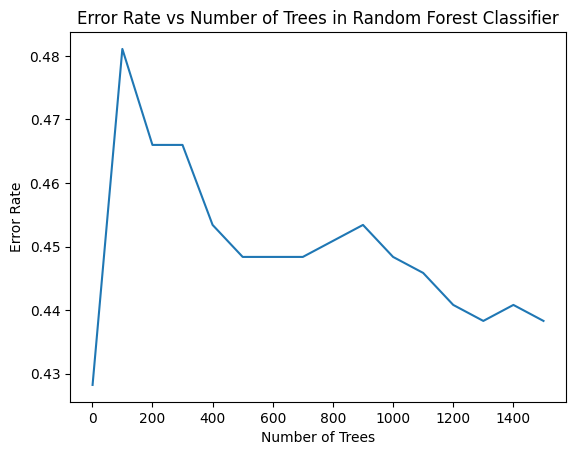

In [ ]:
from tsfresh.defaults import N_PROCESSES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("/content/updated_DataNifty.csv")
df.index = pd.to_datetime(df['Date'])
df = df.drop(['Date'], axis='columns')

df = df.replace('#DIV/0!', np.nan)
df = df.dropna()
X = df
y = df['Close Price'].shift(-1) > df['Close Price'].astype(int)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the random forest model
# n_trees = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
n_trees = [1]
for i in range(100, 1600, 100):
  n_trees.append(i)
print(n_trees)
error_rates = []

for n in n_trees:
  model = RandomForestClassifier(n_estimators=n, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error_rates.append(1 - accuracy_score(y_test, y_pred))

# Plot the error rate vs number of trees
plt.plot(n_trees, error_rates)
plt.xlabel("Number of Trees")
plt.ylabel("Error Rate")
plt.title("Error Rate vs Number of Trees in Random Forest Classifier")
plt.show()
